# Analyzing Rhode Island Traffic Stops 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [2]:
df=pd.read_csv(r"C:\Users\Nevra\Desktop\Rhode_Island_Traffic_Stops.csv")

C:\Users\Nevra\AppData\Local\Temp\ipykernel_15880\267156903.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Nevra\Desktop\Rhode_Island_Traffic_Stops.csv")


## Preparing the data for analysis

In [3]:
df.head().sort_values("date")

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
1,2,01/10/2005,12:20:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
2,3,01/10/2005,12:30:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
3,4,01/10/2005,12:50:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
4,5,01/10/2005,13:10:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
0,1,22/11/2005,11:15:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding


In [4]:
df.dtypes

raw_row_number         int64
date                  object
time                  object
zone                  object
subject_race          object
subject_sex           object
department_id         object
type                  object
arrest_made           object
contraband_found      object
contraband_drugs      object
contraband_weapons    object
contraband_alcohol    object
reason_for_search     object
reason_for_stop       object
dtype: object

In [5]:
df.shape

(509681, 15)

In [6]:
df.drop("raw_row_number",axis="columns",inplace=True)

In [7]:
df.shape

(509681, 14)

In [8]:
df.isnull().sum()

date                      10
time                      10
zone                      10
subject_race           29073
subject_sex            29097
department_id             10
type                       0
arrest_made            29073
contraband_found      491919
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
reason_for_search     491919
reason_for_stop        29073
dtype: int64

In [9]:
df.dropna(subset=["date"],inplace=True)

In [10]:
df.shape

(509671, 14)

In [11]:
df.isnull().sum()

date                       0
time                       0
zone                       0
subject_race           29063
subject_sex            29087
department_id              0
type                       0
arrest_made            29063
contraband_found      491909
contraband_drugs      493683
contraband_weapons    497876
contraband_alcohol    508454
reason_for_search     491909
reason_for_stop        29063
dtype: int64

In [12]:
df["arrest_made"]=df.arrest_made.astype("boolean")

In [13]:
df["subject_sex"]=df.subject_sex.astype("category")
df["subject_race"]=df.subject_race.astype("category")
df["reason_for_stop"]=df.reason_for_stop.astype("category")
df["zone"]=df.zone.astype("category")

In [14]:
df["contraband_found"]=df.contraband_found.astype("boolean")
df["contraband_drugs"]=df.contraband_drugs.astype("boolean")
df["contraband_weapons"]=df.contraband_weapons.astype("boolean")
df["contraband_alcohol"]=df.contraband_alcohol.astype("boolean")


In [15]:
df.dtypes

date                    object
time                    object
zone                  category
subject_race          category
subject_sex           category
department_id           object
type                    object
arrest_made            boolean
contraband_found       boolean
contraband_drugs       boolean
contraband_weapons     boolean
contraband_alcohol     boolean
reason_for_search       object
reason_for_stop       category
dtype: object

In [16]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
0,22/11/2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
1,01/10/2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
2,01/10/2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
3,01/10/2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
4,01/10/2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding


In [17]:
df["date"]=df.date.str.replace("/","-")

In [18]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding


In [19]:
combined=df.date.str.cat(df.time,sep=" ")

In [20]:
df["date_time"]=pd.to_datetime(combined)

In [21]:
df.date_time

0        2005-11-22 11:15:00
1        2005-01-10 12:20:00
2        2005-01-10 12:30:00
3        2005-01-10 12:50:00
4        2005-01-10 13:10:00
                 ...        
509675   2015-08-16 13:37:00
509676   2015-04-08 10:40:00
509677   2015-12-20 11:17:00
509678   2015-09-11 23:35:00
509679   2015-10-30 11:09:00
Name: date_time, Length: 509671, dtype: datetime64[ns]

In [22]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-22 11:15:00
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:20:00
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:50:00
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00


### Exploring the relationship between gender and policing

In [23]:
df.subject_sex.value_counts()

male      349446
female    131138
Name: subject_sex, dtype: int64

In [24]:
sex_counts=df.subject_sex.value_counts(normalize=True)
sex_counts

male      0.727128
female    0.272872
Name: subject_sex, dtype: float64

Text(0, 0.5, '')

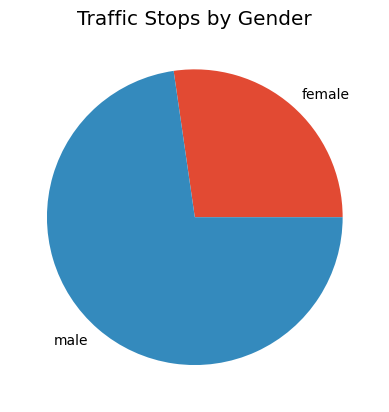

In [157]:
sex_counts.sort_values().plot(kind="pie",title="Traffic Stops by Gender")
plt.ylabel("")

In [26]:
female=df[df["subject_sex"]=="female"]

In [27]:
male=df[df["subject_sex"]=="male"]

In [28]:
arrested=df[df["arrest_made"]==True]

In [29]:
arrested_by_sex=arrested.subject_sex.value_counts(normalize=True).sort_values()
arrested_by_sex

female    0.201349
male      0.798651
Name: subject_sex, dtype: float64

Text(0, 0.5, '')

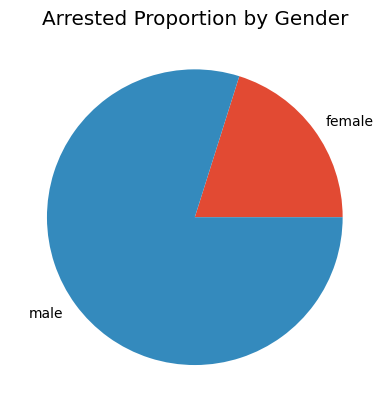

In [158]:
arrested_by_sex.plot(kind="pie",title="Arrested Proportion by Gender")
plt.ylabel("")

In [31]:
arrested_by_race=arrested.subject_race.value_counts(normalize=True)
arrested_by_race

white                     0.556345
black                     0.237186
hispanic                  0.190086
asian/pacific islander    0.015539
other                     0.000843
Name: subject_race, dtype: float64

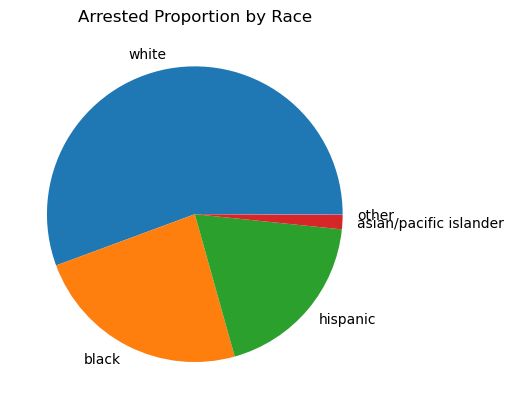

In [32]:
arrested_by_race.plot(kind="pie",radius=1)
plt.ylabel("")
plt.title("Arrested Proportion by Race",loc="center")
plt.style.use("ggplot")

In [33]:
pd.crosstab(arrested.subject_race,arrested.subject_sex).sort_values(by="male")

subject_sex,female,male
subject_race,,
other,2,12
asian/pacific islander,42,216
hispanic,461,2695
black,766,3172
white,2072,7165


Text(0.5, 0, 'Race')

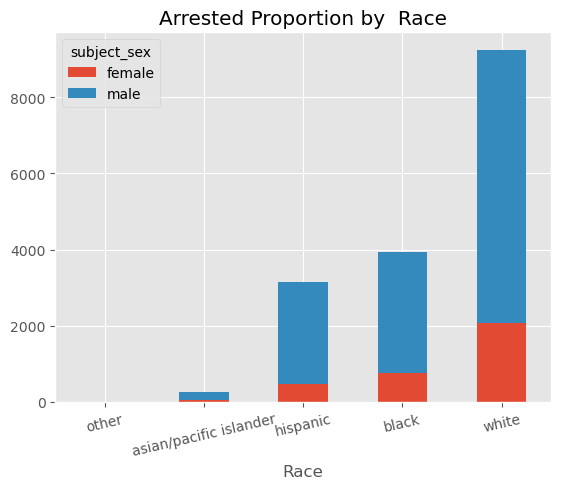

In [34]:
pd.crosstab(arrested.subject_race,arrested.subject_sex).sort_values(by="male").plot(kind="bar",title="Arrested Proportion by  Race",stacked=True,rot=13)
plt.xlabel("Race")

In [35]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [36]:
df.columns

Index(['date', 'time', 'zone', 'subject_race', 'subject_sex', 'department_id',
       'type', 'arrest_made', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'reason_for_search',
       'reason_for_stop', 'date_time'],
      dtype='object')

In [37]:
df.groupby(["subject_race","subject_sex"])["arrest_made"].mean()

subject_race            subject_sex
asian/pacific islander  female         0.014194
                        male           0.021896
black                   female         0.051897
                        male            0.05894
hispanic                female         0.044927
                        male           0.062876
other                   female         0.007843
                        male           0.011019
white                   female         0.020135
                        male            0.02963
Name: arrest_made, dtype: Float64

In [38]:
df.reason_for_stop.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [39]:
female_reason_for_stop=df[df.subject_sex=="female"].reason_for_stop.value_counts()
female_reason_for_stop

Speeding                            86198
Other Traffic Violation             17911
Equipment/Inspection Violation      14039
Registration Violation               5649
Seatbelt Violation                   3550
Call for Service                     2368
Special Detail/Directed Patrol        665
Motorist Assist/Courtesy              332
Violation of City/Town Ordinance      216
APB                                   109
Suspicious Person                      74
Warrant                                27
Name: reason_for_stop, dtype: int64

Text(0.5, 0, 'Count')

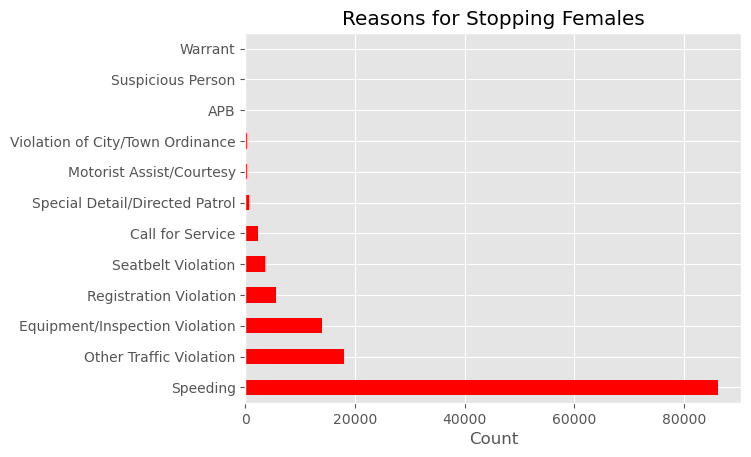

In [40]:
female_reason_for_stop.plot(kind="barh", title="Reasons for Stopping Females",color="Red")
plt.style.use("ggplot")
plt.xlabel("Count")

In [41]:
male_reason_for_stop=df[df.subject_sex=="male"].reason_for_stop.value_counts()
male_reason_for_stop

Speeding                            182538
Other Traffic Violation              72317
Equipment/Inspection Violation       47211
Registration Violation               14181
Special Detail/Directed Patrol       12977
Seatbelt Violation                   12774
Call for Service                      5237
Violation of City/Town Ordinance       820
Motorist Assist/Courtesy               657
APB                                    376
Suspicious Person                      268
Warrant                                 90
Name: reason_for_stop, dtype: int64

Text(0.5, 0, 'Count')

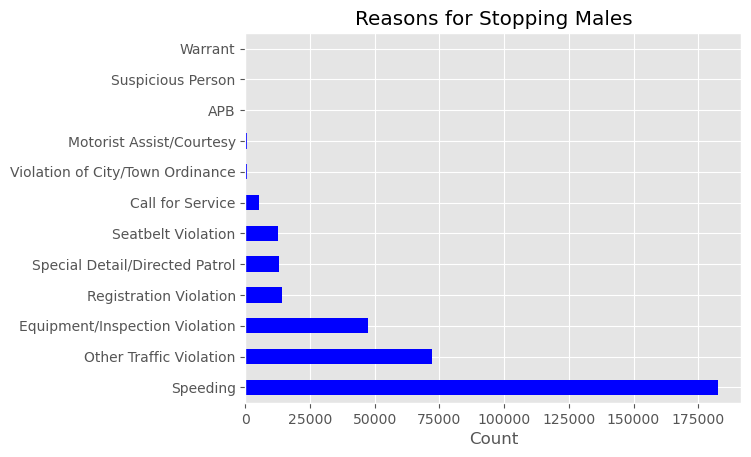

In [42]:
male_reason_for_stop.plot(kind="barh", title="Reasons for Stopping Males",color="Blue")
plt.style.use("ggplot")
plt.xlabel("Count")


In [43]:
f_m_reason_for_stop=pd.concat([female_reason_for_stop,male_reason_for_stop],axis="columns")
f_m_reason_for_stop

,reason_for_stop,reason_for_stop
Speeding,86198,182538
Other Traffic Violation,17911,72317
Equipment/Inspection Violation,14039,47211
Registration Violation,5649,14181
Seatbelt Violation,3550,12774
Call for Service,2368,5237
Special Detail/Directed Patrol,665,12977
Motorist Assist/Courtesy,332,657
Violation of City/Town Ordinance,216,820
APB,109,376


In [44]:
f_m_reason_for_stop.columns=["female","male"]

In [45]:
f_m_reason_for_stop

,female,male
Speeding,86198,182538
Other Traffic Violation,17911,72317
Equipment/Inspection Violation,14039,47211
Registration Violation,5649,14181
Seatbelt Violation,3550,12774
Call for Service,2368,5237
Special Detail/Directed Patrol,665,12977
Motorist Assist/Courtesy,332,657
Violation of City/Town Ordinance,216,820
APB,109,376


Text(0.5, 0, 'Count')

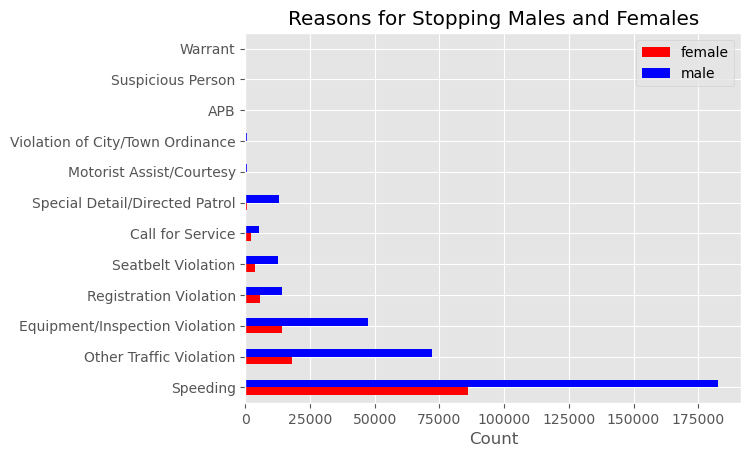

In [46]:
f_m_reason_for_stop.plot(kind="barh",color=["red","blue"],title="Reasons for Stopping Males and Females")
plt.style.use("ggplot")
plt.xlabel("Count")

In [47]:
sex_reason_for_stop=df.groupby(["subject_sex"]).reason_for_stop.value_counts()
sex_reason_for_stop

subject_sex                                  
female       Speeding                             86198
             Other Traffic Violation              17911
             Equipment/Inspection Violation       14039
             Registration Violation                5649
             Seatbelt Violation                    3550
             Call for Service                      2368
             Special Detail/Directed Patrol         665
             Motorist Assist/Courtesy               332
             Violation of City/Town Ordinance       216
             APB                                    109
             Suspicious Person                       74
             Warrant                                 27
male         Speeding                            182538
             Other Traffic Violation              72317
             Equipment/Inspection Violation       47211
             Registration Violation               14181
             Special Detail/Directed Patrol       12977
  

In [48]:
df.groupby(["reason_for_stop","subject_sex",]).arrest_made.mean()

reason_for_stop                   subject_sex
APB                               female         0.192661
                                  male           0.292553
Call for Service                  female         0.141047
                                  male           0.199351
Equipment/Inspection Violation    female         0.061614
                                  male           0.060028
Motorist Assist/Courtesy          female         0.066265
                                  male            0.12481
Other Traffic Violation           female          0.05438
                                  male           0.058008
Registration Violation            female         0.078598
                                  male           0.088781
Seatbelt Violation                female         0.021972
                                  male           0.028026
Special Detail/Directed Patrol    female         0.033083
                                  male           0.007475
Speeding                  

In [49]:
sex_reason_for_stop.items()

In [50]:
sex_reason_for_stop

subject_sex                                  
female       Speeding                             86198
             Other Traffic Violation              17911
             Equipment/Inspection Violation       14039
             Registration Violation                5649
             Seatbelt Violation                    3550
             Call for Service                      2368
             Special Detail/Directed Patrol         665
             Motorist Assist/Courtesy               332
             Violation of City/Town Ordinance       216
             APB                                    109
             Suspicious Person                       74
             Warrant                                 27
male         Speeding                            182538
             Other Traffic Violation              72317
             Equipment/Inspection Violation       47211
             Registration Violation               14181
             Special Detail/Directed Patrol       12977
  

In [51]:
female_arrest=df[(df.arrest_made==True) & (df.subject_sex=="female")]

In [52]:
female_reason_for_stop_count=female_arrest.reason_for_stop.value_counts()
female_reason_for_stop_count

Other Traffic Violation             974
Equipment/Inspection Violation      865
Speeding                            545
Registration Violation              444
Call for Service                    334
Seatbelt Violation                   78
Motorist Assist/Courtesy             22
Special Detail/Directed Patrol       22
APB                                  21
Warrant                              15
Violation of City/Town Ordinance     12
Suspicious Person                    11
Name: reason_for_stop, dtype: int64

Text(0.5, 0, 'Count')

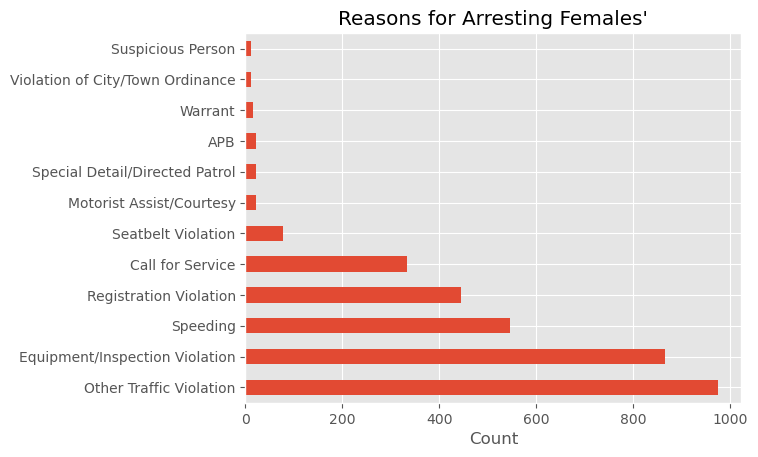

In [53]:
female_arrest["reason_for_stop"].value_counts().plot(kind="barh" ,title="Reasons for Arresting Females'")
plt.style.use("ggplot")
plt.xlabel("Count")

In [54]:
male_arrest=df[(df.arrest_made==True) & (df.subject_sex=="male")]

In [55]:
male_arrest_reason_for_stop_count=male_arrest.reason_for_stop.value_counts()
male_arrest_reason_for_stop_count

Other Traffic Violation             4195
Speeding                            3109
Equipment/Inspection Violation      2834
Registration Violation              1259
Call for Service                    1044
Seatbelt Violation                   358
APB                                  110
Special Detail/Directed Patrol        97
Motorist Assist/Courtesy              82
Suspicious Person                     71
Warrant                               54
Violation of City/Town Ordinance      47
Name: reason_for_stop, dtype: int64

Text(0.5, 0, 'Count')

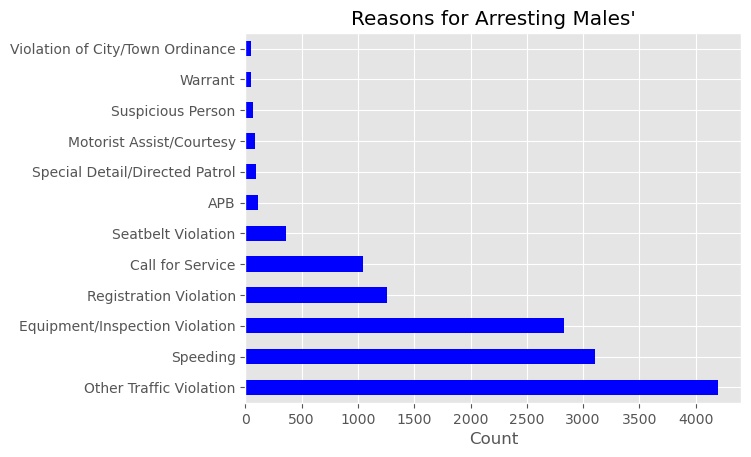

In [56]:
male_arrest["reason_for_stop"].value_counts().plot(kind="barh",color="Blue",title="Reasons for Arresting Males'")
plt.style.use("ggplot")
plt.xlabel("Count")

In [57]:
f_m_arrest_reason_for_stop=pd.concat([female_reason_for_stop_count,male_arrest_reason_for_stop_count],axis="columns")
f_m_arrest_reason_for_stop

,reason_for_stop,reason_for_stop
Other Traffic Violation,974,4195
Equipment/Inspection Violation,865,2834
Speeding,545,3109
Registration Violation,444,1259
Call for Service,334,1044
Seatbelt Violation,78,358
Motorist Assist/Courtesy,22,82
Special Detail/Directed Patrol,22,97
APB,21,110
Warrant,15,54


In [58]:
f_m_arrest_reason_for_stop.columns=["female","male"]

In [59]:
f_m_arrest_reason_for_stop

,female,male
Other Traffic Violation,974,4195
Equipment/Inspection Violation,865,2834
Speeding,545,3109
Registration Violation,444,1259
Call for Service,334,1044
Seatbelt Violation,78,358
Motorist Assist/Courtesy,22,82
Special Detail/Directed Patrol,22,97
APB,21,110
Warrant,15,54


Text(0.5, 0, 'Count')

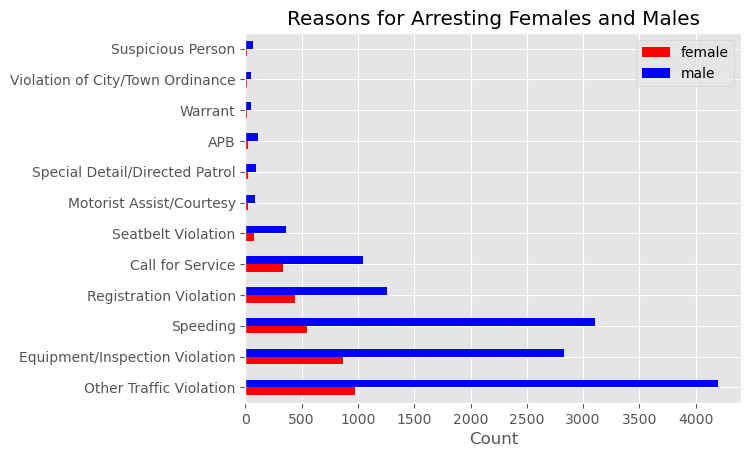

In [60]:
f_m_arrest_reason_for_stop.plot(kind="barh",color=["red","blue"],title="Reasons for Arresting Females and Males")
plt.style.use("ggplot")
plt.xlabel("Count")

In [61]:
male_arrest["reason_for_stop"].value_counts().sum()

13260

In [62]:
female_arrest["reason_for_stop"].value_counts().sum()

3343

In [63]:
## Comparing Speeding Arrests by Gender

In [64]:
female_arrest[female_arrest.reason_for_stop=="Speeding"].shape

(545, 15)

In [65]:
male_arrest[male_arrest.reason_for_stop=="Speeding"].shape

(3109, 15)

In [66]:
female_arrest_speeding=female_arrest[female_arrest.reason_for_stop=="Speeding"]

In [67]:
### Comparing Speeding Arrests and Alcohol Controls by Gender

In [68]:
female_arrest_speeding["contraband_alcohol"].value_counts(normalize=True)

True     0.882353
False    0.117647
Name: contraband_alcohol, dtype: Float64

In [69]:
male_arrest_speeding=male_arrest[male_arrest.reason_for_stop=="Speeding"]

In [70]:
male_arrest_speeding["contraband_alcohol"].value_counts(normalize=True)

True     0.927007
False    0.072993
Name: contraband_alcohol, dtype: Float64

In [71]:
df.arrest_made.mean()

0.034545825287968575

In [72]:
male_arrest_speeding.contraband_alcohol.mean()

0.927007299270073

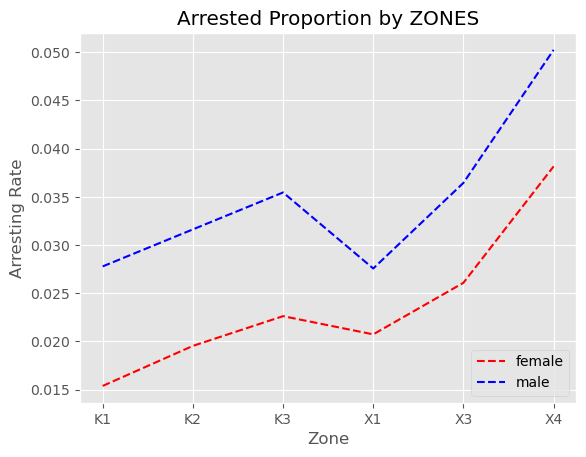

In [73]:
female.groupby("zone")["arrest_made"].mean().plot(kind="line",color="red",linestyle="--",title="Arrested Proportion by ZONES", ylabel="Arresting Rate")
male.groupby("zone")["arrest_made"].mean().plot(kind="line", color="blue",linestyle="--")
plt.xlabel("Zone")
plt.legend(["female","male"],frameon=True,loc="lower right")
plt.style.use("ggplot")

In [74]:
df.zone.unique()

['X3', 'X4', 'K3', 'K2', 'K1', 'X1']
Categories (6, object): ['K1', 'K2', 'K3', 'X1', 'X3', 'X4']

In [75]:
df.groupby(["zone","subject_sex"]).arrest_made.mean()

zone  subject_sex
K1    female         0.015374
      male           0.027779
K2    female         0.019528
      male           0.031619
K3    female         0.022614
      male           0.035451
X1    female         0.020725
      male           0.027561
X3    female         0.026076
      male           0.036446
X4    female         0.038155
      male           0.050246
Name: arrest_made, dtype: Float64

In [76]:
df.groupby(["zone","subject_sex"]).arrest_made.mean()

zone  subject_sex
K1    female         0.015374
      male           0.027779
K2    female         0.019528
      male           0.031619
K3    female         0.022614
      male           0.035451
X1    female         0.020725
      male           0.027561
X3    female         0.026076
      male           0.036446
X4    female         0.038155
      male           0.050246
Name: arrest_made, dtype: Float64

In [77]:
df.reason_for_stop.unique()

['Speeding', 'Other Traffic Violation', 'Equipment/Inspection Violation', 'Motorist Assist/Courtesy', 'Registration Violation', ..., 'Special Detail/Directed Patrol', 'APB', 'Warrant', 'Suspicious Person', 'Seatbelt Violation']
Length: 13
Categories (12, object): ['APB', 'Call for Service', 'Equipment/Inspection Violation', 'Motorist Assist/Courtesy', ..., 'Speeding', 'Suspicious Person', 'Violation of City/Town Ordinance', 'Warrant']

In [78]:
reason_for_stop_total=df.reason_for_stop.value_counts()
reason_for_stop_total

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [79]:
df["violation"]=df.reason_for_stop.str.contains("Violation",na=False)

In [80]:
df.violation.sum()

188679

In [81]:
df.groupby("subject_sex").violation.mean()

subject_sex
female    0.315431
male      0.421533
Name: violation, dtype: float64

In [82]:
df.groupby("subject_sex").violation.mean()

subject_sex
female    0.315431
male      0.421533
Name: violation, dtype: float64

In [83]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time,violation
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-22 11:15:00,False
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:20:00,False
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00,False
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:50:00,False
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00,False


In [84]:
df.set_index("date_time",inplace=True)

In [85]:
df.index

DatetimeIndex(['2005-11-22 11:15:00', '2005-01-10 12:20:00',
               '2005-01-10 12:30:00', '2005-01-10 12:50:00',
               '2005-01-10 13:10:00', '2005-01-10 15:50:00',
               '2005-11-09 11:45:00', '2005-11-09 11:45:00',
               '2005-04-10 11:55:00', '2005-04-10 11:55:00',
               ...
               '2015-12-27 12:45:00', '2015-12-27 13:43:00',
               '2015-12-28 02:29:00', '2015-12-30 11:42:00',
               '2015-09-11 00:23:00', '2015-08-16 13:37:00',
               '2015-04-08 10:40:00', '2015-12-20 11:17:00',
               '2015-09-11 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='date_time', length=509671, freq=None)

In [86]:
df.index.month

Int64Index([11,  1,  1,  1,  1,  1, 11, 11,  4,  4,
            ...
            12, 12, 12, 12,  9,  8,  4, 12,  9, 10],
           dtype='int64', name='date_time', length=509671)

In [87]:
monthly_arrest_rate=df.groupby(df.index.month).arrest_made.mean()

In [88]:
df.arrest_made.mean()

0.034545825287968575

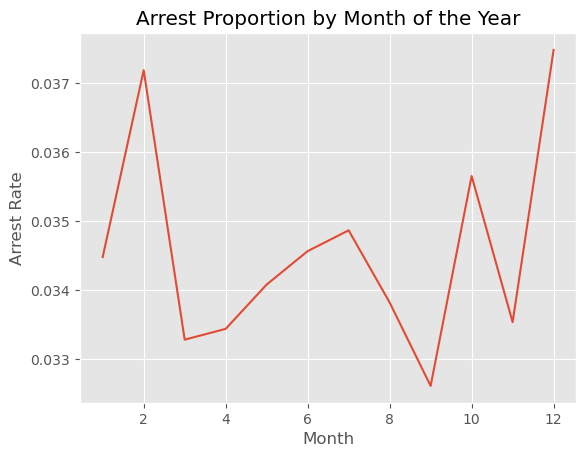

In [89]:
monthly_arrest_rate.plot()
plt.xlabel("Month")
plt.ylabel("Arrest Rate")
plt.title("Arrest Proportion by Month of the Year")
plt.style.use("ggplot")

In [90]:
hourly_arrest_rate=df.groupby(df.index.hour).arrest_made.mean()
hourly_arrest_rate

date_time
0     0.052142
1     0.067121
2     0.061063
3     0.052604
4     0.053897
5     0.032657
6     0.012948
7     0.013829
8     0.019714
9     0.024698
10    0.025582
11    0.027078
12    0.031359
13    0.030248
14    0.031529
15    0.032124
16    0.033519
17    0.038989
18    0.039898
19    0.031366
20    0.039292
21    0.059956
22     0.04398
23    0.045084
Name: arrest_made, dtype: Float64

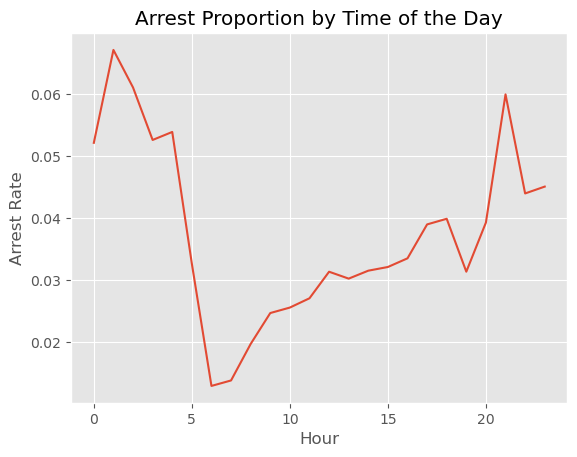

In [91]:
hourly_arrest_rate.plot()
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Proportion by Time of the Day")
plt.style.use("ggplot")
plt.show()

In [92]:
female.head()


,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00
7,11-09-2005,11:45:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-09 11:45:00
10,04-10-2005,14:28:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-04-10 14:28:00
15,10-10-2005,18:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,2005-10-10 18:10:00


In [93]:
female.set_index("date_time",inplace=True)
male.set_index("date_time",inplace=True)

In [94]:
df.subject_sex.value_counts()

male      349446
female    131138
Name: subject_sex, dtype: int64

In [95]:
annual_female_arrest=female.resample("A").arrest_made.count()
annual_female_arrest

date_time
2005-12-31     3699
2006-12-31    15695
2007-12-31    14481
2008-12-31    11819
2009-12-31     9594
2010-12-31     9886
2011-12-31    10800
2012-12-31    16072
2013-12-31    12245
2014-12-31    14079
2015-12-31    12768
Freq: A-DEC, Name: arrest_made, dtype: int64

In [96]:
annual_male_arrest=male.resample("A").arrest_made.count()
annual_male_arrest


date_time
2005-12-31    10110
2006-12-31    39857
2007-12-31    35658
2008-12-31    33751
2009-12-31    30226
2010-12-31    29554
2011-12-31    31830
2012-12-31    41553
2013-12-31    29677
2014-12-31    34799
2015-12-31    32431
Freq: A-DEC, Name: arrest_made, dtype: int64

In [97]:
annuel_arrest=pd.concat([annual_female_arrest,annual_male_arrest],axis='columns')
annuel_arrest

,arrest_made,arrest_made
date_time,,
2005-12-31,3699,10110
2006-12-31,15695,39857
2007-12-31,14481,35658
2008-12-31,11819,33751
2009-12-31,9594,30226
2010-12-31,9886,29554
2011-12-31,10800,31830
2012-12-31,16072,41553
2013-12-31,12245,29677


In [98]:
annuel_arrest.columns

Index(['arrest_made', 'arrest_made'], dtype='object')

In [99]:
annuel_arrest.columns=["female_arrest","male_arrest"]

In [100]:
annuel_arrest

,female_arrest,male_arrest
date_time,,
2005-12-31,3699,10110
2006-12-31,15695,39857
2007-12-31,14481,35658
2008-12-31,11819,33751
2009-12-31,9594,30226
2010-12-31,9886,29554
2011-12-31,10800,31830
2012-12-31,16072,41553
2013-12-31,12245,29677


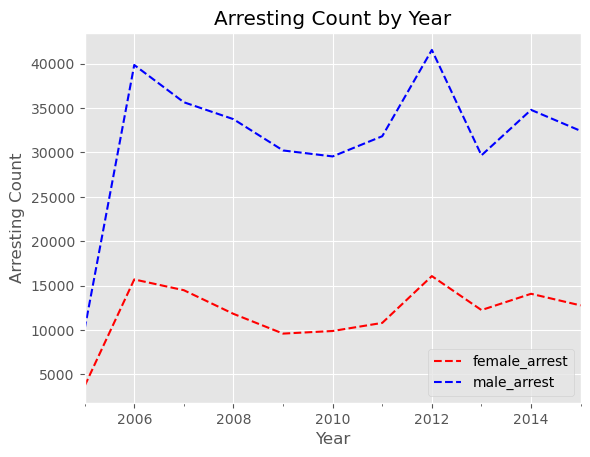

In [101]:
annuel_arrest.plot(style="--",color="rb")
plt.xlabel("Year")
plt.ylabel("Arresting Count")
plt.title("Arresting Count by Year")
plt.style.use("ggplot")
plt.legend(frameon=True,loc="lower right")

In [102]:
annuel_contraband_found=df.contraband_found.resample("A").mean()
annuel_contraband_found

date_time
2005-12-31    0.262857
2006-12-31    0.275632
2007-12-31    0.308389
2008-12-31    0.312986
2009-12-31    0.332997
2010-12-31    0.354819
2011-12-31    0.387578
2012-12-31    0.406989
2013-12-31    0.493432
2014-12-31    0.503392
2015-12-31    0.502385
Freq: A-DEC, Name: contraband_found, dtype: Float64

In [103]:
annuel_contraband_drugs=df.contraband_drugs.resample("A").mean()
annuel_contraband_drugs


date_time
2005-12-31    0.177033
2006-12-31    0.193582
2007-12-31     0.22524
2008-12-31    0.217172
2009-12-31    0.238669
2010-12-31     0.27027
2011-12-31    0.329939
2012-12-31    0.349971
2013-12-31    0.445837
2014-12-31    0.467683
2015-12-31    0.433484
Freq: A-DEC, Name: contraband_drugs, dtype: Float64

In [104]:
annuel_contraband_weapons=df.contraband_weapons.resample("A").mean()
annuel_contraband_weapons

date_time
2005-12-31    0.045872
2006-12-31    0.032704
2007-12-31    0.043762
2008-12-31    0.048276
2009-12-31     0.03701
2010-12-31    0.043363
2011-12-31    0.035645
2012-12-31    0.037359
2013-12-31    0.047401
2014-12-31    0.050441
2015-12-31    0.060294
Freq: A-DEC, Name: contraband_weapons, dtype: Float64

In [105]:
annuel_contraband_alcohol=df.contraband_alcohol.resample("A").mean()
annuel_contraband_alcohol

date_time
2005-12-31    0.946429
2006-12-31    0.958904
2007-12-31    0.942857
2008-12-31    0.970149
2009-12-31    0.952381
2010-12-31        0.92
2011-12-31    0.854369
2012-12-31    0.983051
2013-12-31    0.911392
2014-12-31    0.704545
2015-12-31    0.901961
Freq: A-DEC, Name: contraband_alcohol, dtype: Float64

In [106]:
annuel_contraband_all=pd.concat([annuel_contraband_found,annuel_contraband_drugs,annuel_contraband_weapons,annuel_contraband_alcohol],axis="columns")
annuel_contraband_all

,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol
date_time,,,,
2005-12-31,0.262857,0.177033,0.045872,0.946429
2006-12-31,0.275632,0.193582,0.032704,0.958904
2007-12-31,0.308389,0.22524,0.043762,0.942857
2008-12-31,0.312986,0.217172,0.048276,0.970149
2009-12-31,0.332997,0.238669,0.03701,0.952381
2010-12-31,0.354819,0.27027,0.043363,0.92
2011-12-31,0.387578,0.329939,0.035645,0.854369
2012-12-31,0.406989,0.349971,0.037359,0.983051
2013-12-31,0.493432,0.445837,0.047401,0.911392


Text(0.5, 0, 'Year')

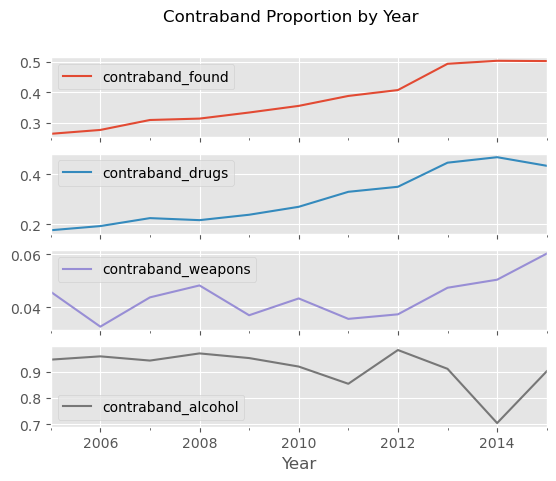

In [107]:
annuel_contraband_all.plot(subplots="True",title="Contraband Proportion by Year")
plt.xlabel("Year")


In [108]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
date_time,,,,,,,,,,,,,,,
2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [109]:
df.arrest_made.value_counts()

False    464005
True      16603
Name: arrest_made, dtype: Int64

In [110]:
df.zone

date_time
2005-11-22 11:15:00    X3
2005-01-10 12:20:00    X3
2005-01-10 12:30:00    X3
2005-01-10 12:50:00    X3
2005-01-10 13:10:00    X3
                       ..
2015-08-16 13:37:00    X1
2015-04-08 10:40:00    X3
2015-12-20 11:17:00    K3
2015-09-11 23:35:00    X4
2015-10-30 11:09:00    X4
Name: zone, Length: 509671, dtype: category
Categories (6, object): ['K1', 'K2', 'K3', 'X1', 'X3', 'X4']

In [111]:
df[df.arrest_made==True].reason_for_stop

date_time
2005-03-12 15:35:00    Other Traffic Violation
2005-11-21 10:20:00     Registration Violation
2005-02-12 09:59:00     Registration Violation
2005-02-12 15:55:00                   Speeding
2005-02-12 15:55:00                   Speeding
                                ...           
2015-03-10 17:14:00    Other Traffic Violation
2015-03-10 17:14:00    Other Traffic Violation
2015-04-10 01:07:00                   Speeding
2015-04-10 02:40:00    Other Traffic Violation
2015-03-10 08:11:00           Call for Service
Name: reason_for_stop, Length: 16603, dtype: category
Categories (12, object): ['APB', 'Call for Service', 'Equipment/Inspection Violation', 'Motorist Assist/Courtesy', ..., 'Speeding', 'Suspicious Person', 'Violation of City/Town Ordinance', 'Warrant']

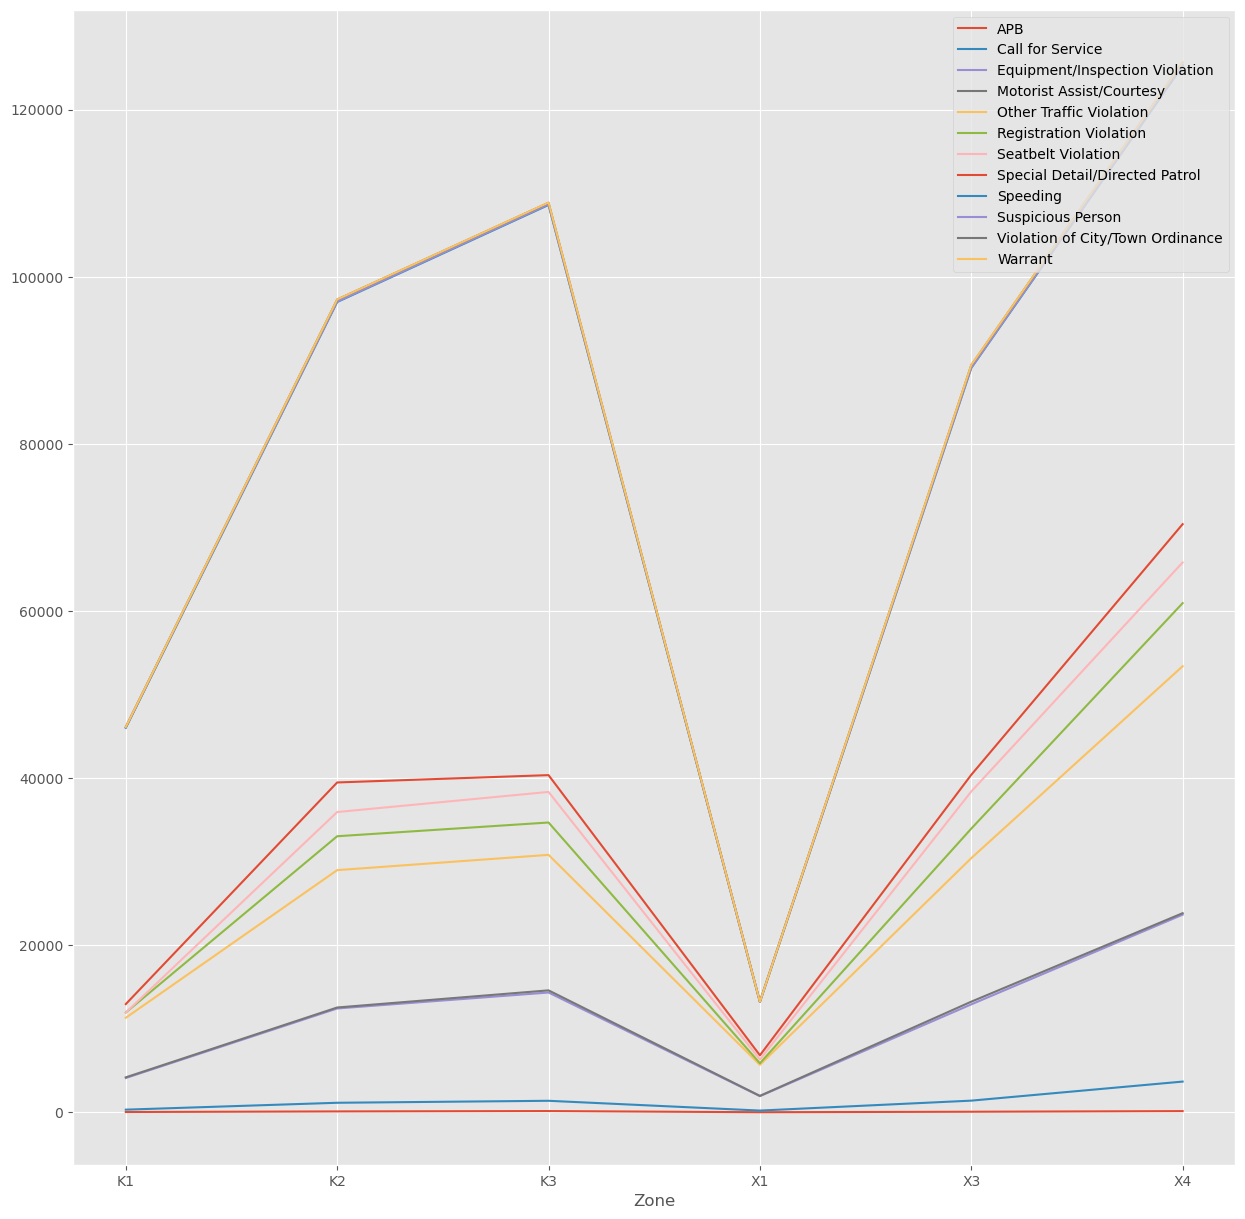

In [112]:
df_zone_reason_for_stop=pd.crosstab(df.zone,df.reason_for_stop)
df_zone_reason_for_stop.plot(kind="line",figsize=(15,15),stacked=True)
plt.xlabel("Zone")
plt.legend(loc="upper right")



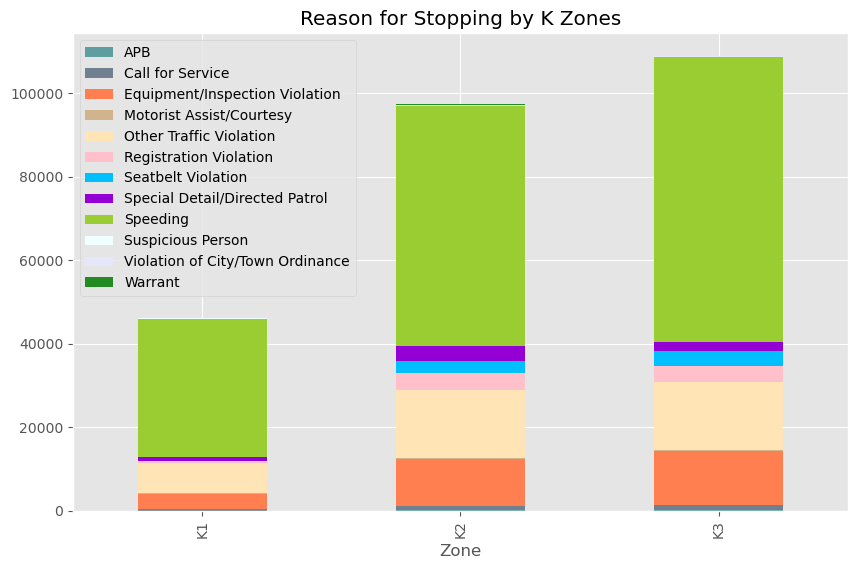

In [113]:
df_zone_reason_for_stop.loc["K1":"K3"].plot(figsize=(10,6.2),kind="bar",stacked=True,color=["cadetblue","slategray","coral","tan","moccasin","pink","deepskyblue","darkviolet","yellowgreen","azure","lavender","forestgreen"])
plt.xlabel("Zone")
plt.title("Reason for Stopping by K Zones")
plt.legend(loc="upper left")

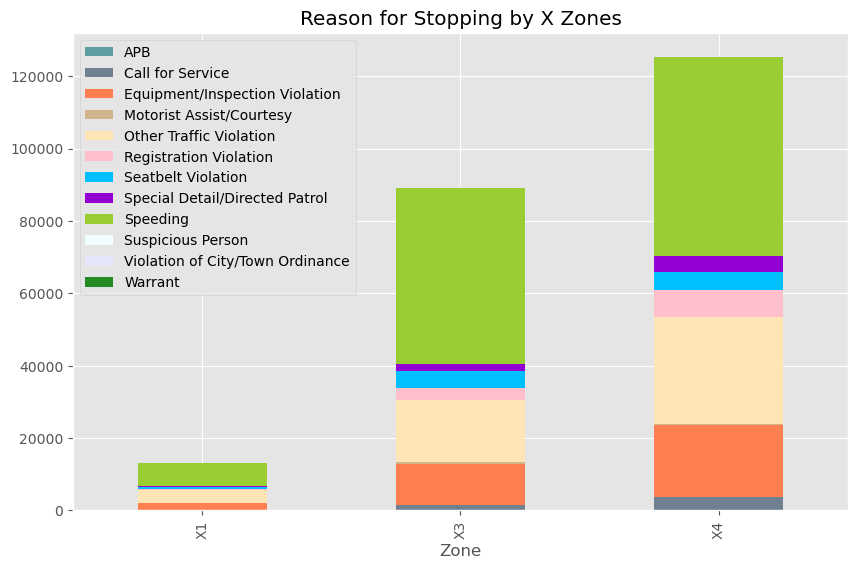

In [114]:
df_zone_reason_for_stop.loc["X1":"X4"].plot(kind="bar",figsize=(10,6.2),stacked=True,color=["cadetblue","slategray","coral","tan","moccasin","pink","deepskyblue","darkviolet","yellowgreen","azure","lavender","forestgreen"])
plt.xlabel("Zone")
plt.title("Reason for Stopping by X Zones")
plt.legend(loc="upper left")

In [115]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
date_time,,,,,,,,,,,,,,,
2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [116]:
weather=pd.read_csv(r"C:\Users\Nevra\Desktop\Rhode_Island_Climate_Data.csv")
weather

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
0,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",01/10/2005,5.37,1432.0,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",02/10/2005,2.91,1510.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",03/10/2005,4.03,1457.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",04/10/2005,4.47,1547.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",05/10/2005,3.80,1515.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",27/12/2015,9.17,NaN,NaN,0.20,0.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3740,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",28/12/2015,12.30,NaN,NaN,0.00,0.0,0.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3741,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",29/12/2015,12.53,NaN,NaN,0.70,0.6,0.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3742,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",30/12/2015,6.93,NaN,NaN,0.01,0.0,0.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,3744.000000,1005.000000,3744.000000
mean,43.367788,53.215920,61.130609
std,16.876732,17.573016,18.005692
min,-5.000000,6.000000,15.000000
25%,30.000000,40.000000,47.000000
50%,43.500000,55.000000,62.000000
75%,58.000000,69.000000,76.000000
max,77.000000,86.000000,102.000000


Text(0.5, 1.0, 'Temperature Values')

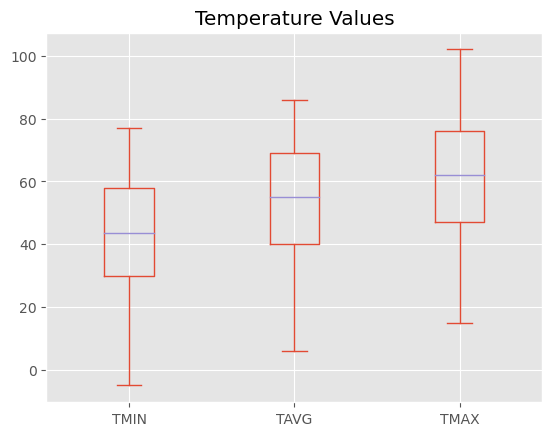

In [118]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind='box')
plt.title("Temperature Values")

In [119]:
weather["TDIFF"]=weather["TMAX"]-weather["TMIN"]

In [120]:
weather[["TMIN", "TAVG", "TMAX","TDIFF"]]

,TMIN,TAVG,TMAX,TDIFF
0,44,NaN,68,24
1,48,NaN,75,27
2,51,NaN,72,21
3,57,NaN,72,15
4,59,NaN,75,16
...,...,...,...,...
3739,44,51.0,61,17
3740,30,40.0,44,14
3741,28,33.0,40,12
3742,27,30.0,35,8


In [121]:
weather.TDIFF.describe()

count    3744.000000
mean       17.762821
std         6.328301
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

<AxesSubplot:title={'center':'Daily Temperature Differences Distribution'}, ylabel='Frequency'>

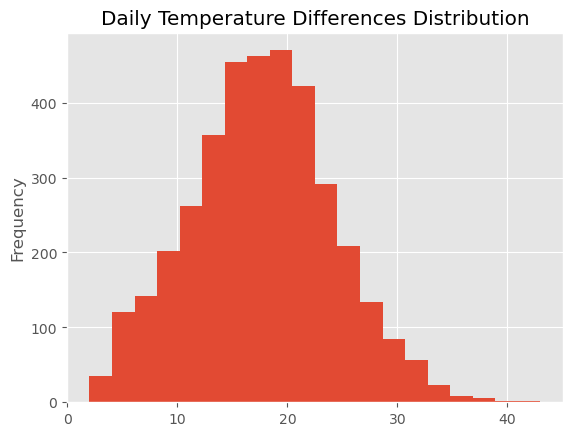

In [122]:
weather.TDIFF.plot(kind="hist",bins=20,title="Daily Temperature Differences Distribution")

In [123]:
""" 
WT is "weather types"
WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain

"""

WT = weather.loc[:,"WT01":"WT22"]
WT

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3741,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3742,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
weather['bad_conditions'] = WT.sum(axis="columns")
weather['bad_conditions']

0       0.0
1       2.0
2       2.0
3       3.0
4       4.0
       ... 
3739    1.0
3740    0.0
3741    3.0
3742    2.0
3743    1.0
Name: bad_conditions, Length: 3744, dtype: float64

In [125]:
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
weather['bad_conditions']

0       0
1       2
2       2
3       3
4       4
       ..
3739    1
3740    0
3741    3
3742    2
3743    1
Name: bad_conditions, Length: 3744, dtype: int32

<AxesSubplot:title={'center':'Bad Weather Conditions Distribution(0-8)'}, ylabel='Frequency'>

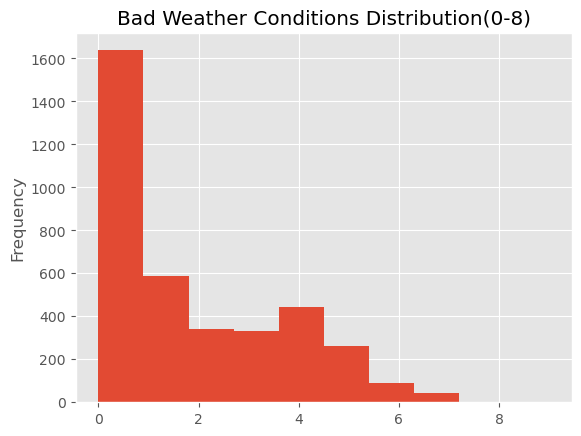

In [126]:
weather.bad_conditions.plot(kind="hist",title="Bad Weather Conditions Distribution(0-8)")

In [127]:
weather.bad_conditions.value_counts().sort_index()

0    1638
1     587
2     342
3     334
4     445
5     262
6      90
7      41
8       2
9       3
Name: bad_conditions, dtype: int64

In [128]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

In [129]:
weather['rating'] = weather.bad_conditions.map(mapping)

In [130]:
weather['rating']

0       good
1        bad
2        bad
3        bad
4        bad
        ... 
3739     bad
3740    good
3741     bad
3742     bad
3743     bad
Name: rating, Length: 3744, dtype: object

In [131]:
weather.rating.value_counts()

bad      1708
good     1638
worse     398
Name: rating, dtype: int64

In [132]:
cats = pd.CategoricalDtype(['good','bad','worse'], ordered=True)

In [133]:
weather['rating'] = weather.rating.astype(cats)

In [134]:
weather.rating.head()

0    good
1     bad
2     bad
3     bad
4     bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [135]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
date_time,,,,,,,,,,,,,,,
2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [136]:
df.reset_index(inplace=True)

In [137]:
df.head()

,date_time,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
0,2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
1,2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2,2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
3,2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
4,2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [138]:
weather["DATE"]=weather.DATE.str.replace("/","-")

In [139]:
weather.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT16,WT17,WT18,WT19,WT21,WT22,WV20,TDIFF,bad_conditions,rating
0,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",01-10-2005,5.37,1432.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,0,good
1,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",02-10-2005,2.91,1510.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,2,bad
2,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",03-10-2005,4.03,1457.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2,bad
3,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",04-10-2005,4.47,1547.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,3,bad
4,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",05-10-2005,3.80,1515.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,4,bad


In [140]:
weather_rating=weather[["DATE","rating"]]

In [141]:
df.head().sort_values("date")

,date_time,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
1,2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2,2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
3,2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
4,2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
0,2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [142]:
weather.shape

(3744, 42)

In [143]:
df.shape

(509671, 16)

In [144]:
df_weather=pd.merge(left=df,right=weather_rating,left_on="date",right_on="DATE",how="left")
df_weather.sort_values("date")

,date_time,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation,DATE,rating
15476,2006-01-01 07:55:00,01-01-2006,07:55:00,K3,white,male,300,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
15849,2006-01-01 03:55:00,01-01-2006,03:55:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,True,01-01-2006,bad
15198,2006-01-01 09:35:00,01-01-2006,09:35:00,K3,white,male,300,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
17183,2006-01-01 02:30:00,01-01-2006,02:30:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
17172,2006-01-01 01:50:00,01-01-2006,01:50:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486216,2015-12-31 21:32:00,31-12-2015,21:32:00,X3,black,male,200.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Registration Violation,True,31-12-2015,bad
486217,2015-12-31 22:04:00,31-12-2015,22:04:00,X3,white,male,200.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,True,31-12-2015,bad
486218,2015-12-31 23:08:00,31-12-2015,23:08:00,X3,hispanic,male,200.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,True,31-12-2015,bad
470771,2015-12-31 20:49:00,31-12-2015,20:49:00,K2,white,male,900.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,True,31-12-2015,bad


In [145]:
df_weather.set_index("date",inplace=True)
df_weather.head()

,date_time,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation,DATE,rating
date,,,,,,,,,,,,,,,,,
22-11-2005,2005-11-22 11:15:00,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,22-11-2005,bad
01-10-2005,2005-01-10 12:20:00,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good
01-10-2005,2005-01-10 12:30:00,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good
01-10-2005,2005-01-10 12:50:00,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good
01-10-2005,2005-01-10 13:10:00,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good


In [146]:
df.date.head().sort_values()

1    01-10-2005
2    01-10-2005
3    01-10-2005
4    01-10-2005
0    22-11-2005
Name: date, dtype: object

In [147]:
df_weather.shape

(509671, 17)

In [148]:
df.shape

(509671, 16)

In [149]:
df_weather_arrested=df_weather[df_weather.arrest_made==True]
df_weather_arrested.head()

,date_time,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation,DATE,rating
date,,,,,,,,,,,,,,,,,
03-12-2005,2005-03-12 15:35:00,15:35:00,X3,white,male,200,vehicular,True,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,True,03-12-2005,good
21-11-2005,2005-11-21 10:20:00,10:20:00,K3,white,female,300,vehicular,True,<NA>,<NA>,<NA>,<NA>,NaN,Registration Violation,True,21-11-2005,bad
02-12-2005,2005-02-12 09:59:00,09:59:00,K2,black,female,900,vehicular,True,<NA>,<NA>,<NA>,<NA>,NaN,Registration Violation,True,02-12-2005,good
02-12-2005,2005-02-12 15:55:00,15:55:00,K3,white,male,300,vehicular,True,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,02-12-2005,good
02-12-2005,2005-02-12 15:55:00,15:55:00,K3,white,male,300,vehicular,True,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,02-12-2005,good


In [150]:
df_weather.arrest_made.mean()

0.034545825287968575

In [151]:
df_weather.groupby("rating").arrest_made.mean()

rating
good     0.032996
bad      0.035182
worse    0.039354
Name: arrest_made, dtype: Float64

Text(0.5, 0, 'Weather Rating')

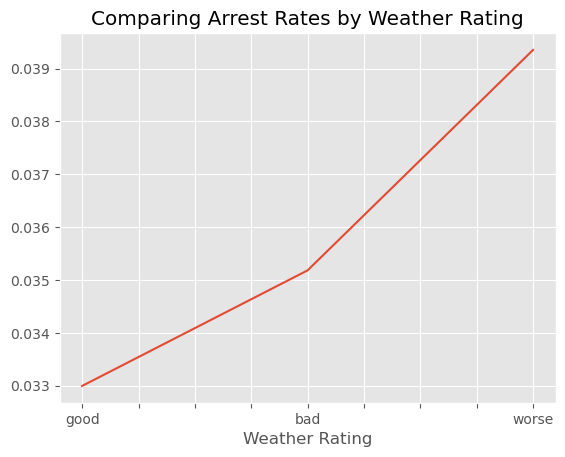

In [152]:
df_weather.groupby("rating").arrest_made.mean().plot(kind="line",title="Comparing Arrest Rates by Weather Rating")
plt.xlabel("Weather Rating")

In [153]:
df_weather_arrested=df_weather[df_weather.arrest_made==True]

In [154]:
df_weather_arrested[["rating","reason_for_stop"]].groupby(["rating"]).reason_for_stop.value_counts(normalize=True)

rating                                  
good    Other Traffic Violation             0.309456
        Equipment/Inspection Violation      0.223496
        Speeding                            0.221313
        Registration Violation              0.096466
        Call for Service                    0.077773
        Seatbelt Violation                  0.035612
        APB                                 0.007777
        Special Detail/Directed Patrol      0.007095
        Motorist Assist/Courtesy            0.006822
        Warrant                             0.005594
        Suspicious Person                   0.004912
        Violation of City/Town Ordinance    0.003684
bad     Other Traffic Violation             0.315119
        Equipment/Inspection Violation      0.222120
        Speeding                            0.212531
        Registration Violation              0.108367
        Call for Service                    0.086431
        Seatbelt Violation                  0.022987
     

In [155]:
df_weather_arrested_count=df_weather_arrested[["rating","reason_for_stop"]].groupby(["rating"]).reason_for_stop.value_counts(normalize=True).unstack()
df_weather_arrested_count.head()

,APB,Call for Service,Equipment/Inspection Violation,Motorist Assist/Courtesy,Other Traffic Violation,Registration Violation,Seatbelt Violation,Special Detail/Directed Patrol,Speeding,Suspicious Person,Violation of City/Town Ordinance,Warrant
rating,,,,,,,,,,,,
good,0.007777,0.077773,0.223496,0.006822,0.309456,0.096466,0.035612,0.007095,0.221313,0.004912,0.003684,0.005594
bad,0.007619,0.086431,0.222120,0.006042,0.315119,0.108367,0.022987,0.007356,0.212531,0.005254,0.003021,0.003153
worse,0.009691,0.090248,0.223501,0.004846,0.299818,0.103574,0.000000,0.006663,0.250151,0.003634,0.005451,0.002423


Text(0.5, 0, 'Rating')

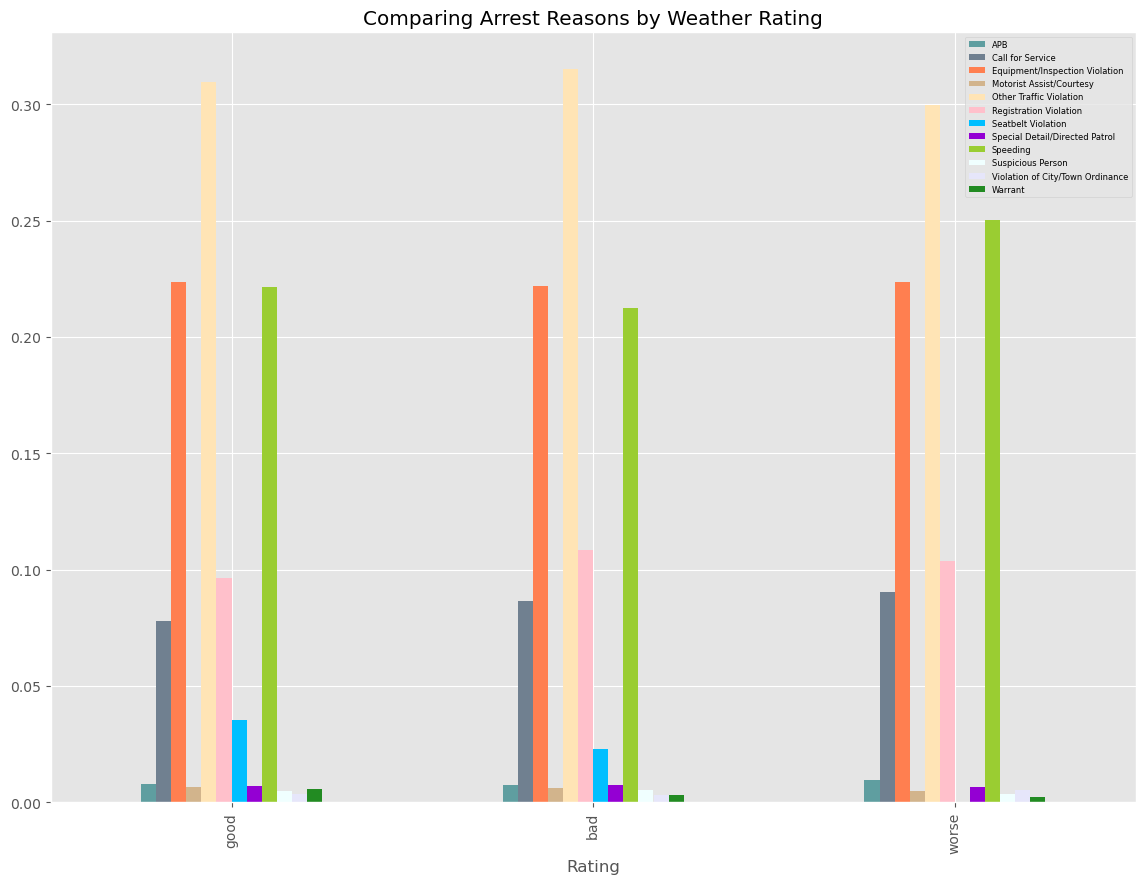

In [156]:
df_weather_arrested_count.plot(kind="bar",figsize=(14,10),color=["cadetblue","slategray","coral","tan","moccasin","pink","deepskyblue","darkviolet","yellowgreen","azure","lavender","forestgreen"],title="Comparing Arrest Reasons by Weather Rating")
plt.legend(fontsize=6,loc="upper right")
plt.xlabel("Rating")